# Process the ERA5-Land Total Evaporation Data

This Notebook processes the ERA5-Land total evaporation data (Muñoz,2019). The total evaporation data is used for the analysis of the HBV parameter S_{u,max}.

First, the data per year is combined to one dataset containing all years. Next, the total evaporation are renamed and converted to the right unit. Finally, the processed dataset is downloaded.

Muñoz Sabater, J. (2019). <I>ERA5-Land hourly data from 1950 to present. Copernicus Climate Change Service (C3S) Climate Data Store (CDS).</I> DOI: 10.24381/cds.e2161bac

## Import the required packages

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import datetime

## Define the inputfolder

In [2]:
infolder = 'C:/Users/924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Total Evaporation - ERA5'

## Define the downloaded years

In [3]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

## Merge the datasets

The NetCDF files per year are opened and stored in an array. Next, this array is merged to a combined dataset.

In [4]:
total = []
for year in years:
    total.append(xr.open_dataset(f'{infolder}/Per year/{year}.nc'))

In [5]:
ds = xr.merge(total)

## Remove the negative values and rename the unit

In [6]:
ds['e'] = ds.e * -1000
ds.e.attrs['units'] = 'mm'
ds['e'] = ds.variables['e'].where(ds.variables['e'] >= 0, 0)

## Rename the coordinates and remove double timesteps

In [7]:
time = np.unique(np.array(ds.time).astype('datetime64[D]'))
time = time[0:len(time)-3]
longitude = ds.longitude
latitude = ds.latitude

In [8]:
data = ds.e.isel(time=slice(24,len(time)*24+24,24))

## Create the dataset

In [9]:
daily_data = xr.Dataset(
    data_vars =  {'evaporation': (['time','latitude','longitude'],data.data)},
    coords = {'time': time,'latitude': latitude,'longitude': longitude},
    attrs = {'unit': 'mm'}
)

In [10]:
daily_data

<xarray.Dataset>
Dimensions:      (time: 4748, latitude: 6, longitude: 7)
Coordinates:
  * time         (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2022-12-31
  * latitude     (latitude) float32 51.0 50.9 50.8 50.7 50.6 50.5
  * longitude    (longitude) float32 5.6 5.7 5.8 5.9 6.0 6.1 6.2
Data variables:
    evaporation  (time, latitude, longitude) float32 0.3159 0.3146 ... 1.356
Attributes:
    unit:     mm

## Check data

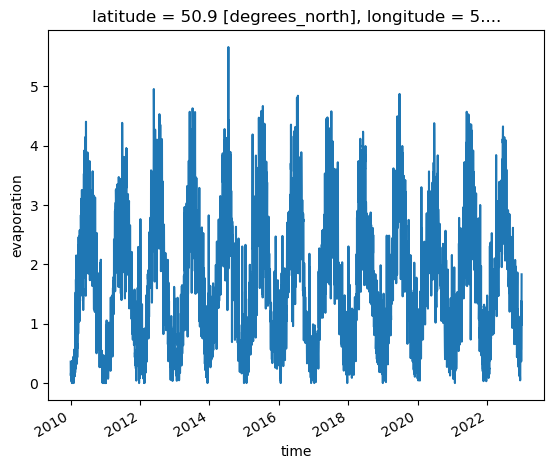

In [11]:
Meerssen = [5.725796,50.89121]
test2 = daily_data.evaporation.sel(longitude=Meerssen[0],latitude=Meerssen[1],method='nearest').plot()

## Download the dataset

In [12]:
daily_data.to_netcdf(f'{infolder}/daily_evaporation.nc')